In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/arabic-poetry-dataset-478-2017/all_poems.csv


In [34]:
df = pd.read_csv('/kaggle/input/arabic-poetry-dataset-478-2017/all_poems.csv')
df.head(5)

,poem_id,poem_link,poem_style,poem_text,poem_title,poet_cat,poet_id,poet_link,poet_name
0,21,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,عيناك غابتا نخيل ساعة السحر او شرفتان راح يناي...,أنشودة المطر,العراق,2,http://www.adab.com/modules.php?name=Sh3er&doW...,بدر شاكر السياب
1,65546,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,انا لا ازال و في يدي قدحي ياليل اين تفرق الشر...,أقداح و أحلام,العراق,2,http://www.adab.com/modules.php?name=Sh3er&doW...,بدر شاكر السياب
2,65561,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,علي مقلتيك ارتشفت النجوم وعانقت امالي الايبة ...,هوى واحد !,العراق,2,http://www.adab.com/modules.php?name=Sh3er&doW...,بدر شاكر السياب
3,65554,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,اساطير من حشرجات الزمان نسيج اليد البالية رواه...,أساطير,العراق,2,http://www.adab.com/modules.php?name=Sh3er&doW...,بدر شاكر السياب
4,65550,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,والتف حولك ساعداي ومال جيدك في اشتهاء كالزهرة ...,اللقاء الأخير,العراق,2,http://www.adab.com/modules.php?name=Sh3er&doW...,بدر شاكر السياب


In [4]:
df['poem_text'][0]

'عيناك غابتا نخيل ساعة السحر او شرفتان راح يناي عنهما القمر عيناك حين تبسمان تورق الكروم وترقص الاضواء كالاقمار في نهر يرجه المجذاف وهنا ساعة السحر كانما تنبض في غوريهما النجوم وتغرقان في ضباب من اسي شفيف كالبحر سرح اليدين فوقه المساء دفء الشتاء فيه وارتعاشة الخريف والموت والميلاد والظلام والضياء فتستفيق ملء روحي رعشة البكاء ونشوة وحشية تعانق السماء كنشوة الطفل اذا خاف من القمر كان اقواس السحاب تشرب الغيوم وقطرة فقطرة تذوب في المطر وكركر الاطفال في عراءش الكروم ودغدغت صمت العصافير علي الشجر انشودة المطر مطر مطر مطر تثاءب المساء والغيوم ما تزال تسح ما تسح من دموعها الثقال كان طفلا بات يهذي قبل ان ينام بان امه – التي افاق منذ عام فلم يجدها ثم حين لج في السءال قالوا له "بعد غد تعود " لا بد ان تعود وان تهامس الرفاق انها هناك في جانب التل تنام نومة الحود تسف من ترابها وتشرب المطر كان صيادا حزينا يجمع الشباك ويلعن المياه والقدر وينثر الغناء حيث يافل القمر مطر مطر اتعلمين اي حزن يبعث المطر وكيف تنشج المزاريب اذا انهمر وكيف يشعر الوحيد فيه بالضياع بلا انتهاء – كالدم المراق كالجياع كالحب كالاطف

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58021 entries, 0 to 58020
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   poem_id     58021 non-null  int64 
 1   poem_link   58021 non-null  object
 2   poem_style  58021 non-null  object
 3   poem_text   58020 non-null  object
 4   poem_title  58021 non-null  object
 5   poet_cat    58021 non-null  object
 6   poet_id     58021 non-null  int64 
 7   poet_link   58021 non-null  object
 8   poet_name   58021 non-null  object
dtypes: int64(2), object(7)
memory usage: 4.0+ MB


In [6]:
df.isnull().sum()


poem_id       0
poem_link     0
poem_style    0
poem_text     1
poem_title    0
poet_cat      0
poet_id       0
poet_link     0
poet_name     0
dtype: int64

In [7]:
df= df.dropna()


In [8]:
df.isnull().sum()

poem_id       0
poem_link     0
poem_style    0
poem_text     0
poem_title    0
poet_cat      0
poet_id       0
poet_link     0
poet_name     0
dtype: int64

In [9]:
df.duplicated().sum()


0

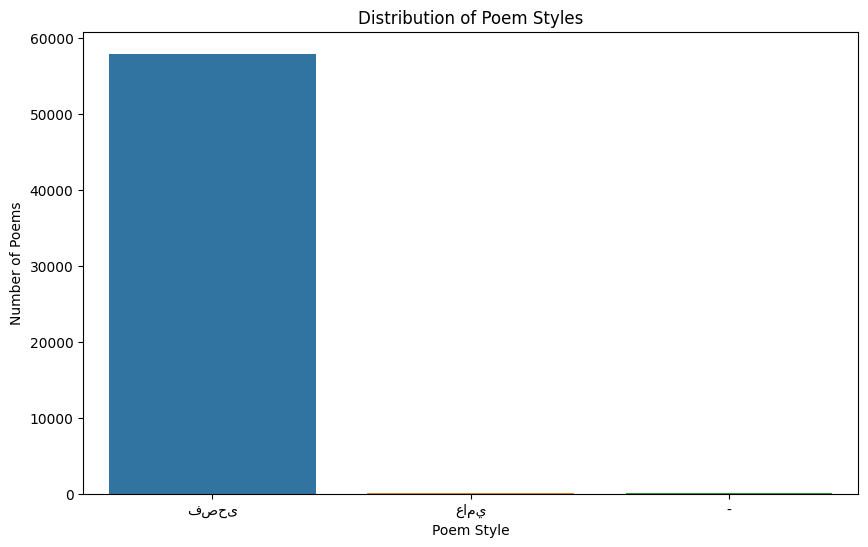

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of poems per style
style_counts = df['poem_style'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=style_counts.index, y=style_counts.values)
plt.title('Distribution of Poem Styles')
plt.xlabel('Poem Style')
plt.ylabel('Number of Poems')
plt.show()

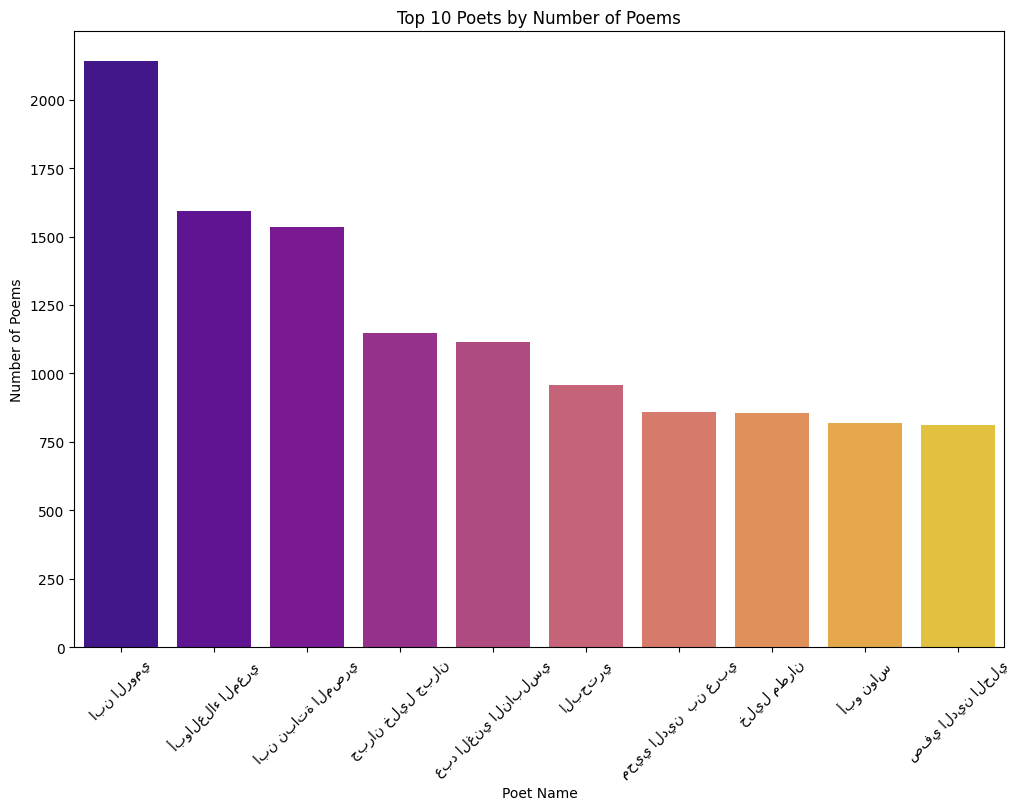

In [31]:
# Count the number of poems per poet
poet_counts = df['poet_name'].value_counts()
top_poets = poet_counts.head(10)

# Plot the top poets
plt.figure(figsize=(12, 8))
sns.barplot(x=top_poets.index, y=top_poets.values, palette='plasma')
plt.title('Top 10 Poets by Number of Poems')
plt.xlabel('Poet Name')
plt.ylabel('Number of Poems')
plt.xticks(rotation=45)
plt.show()


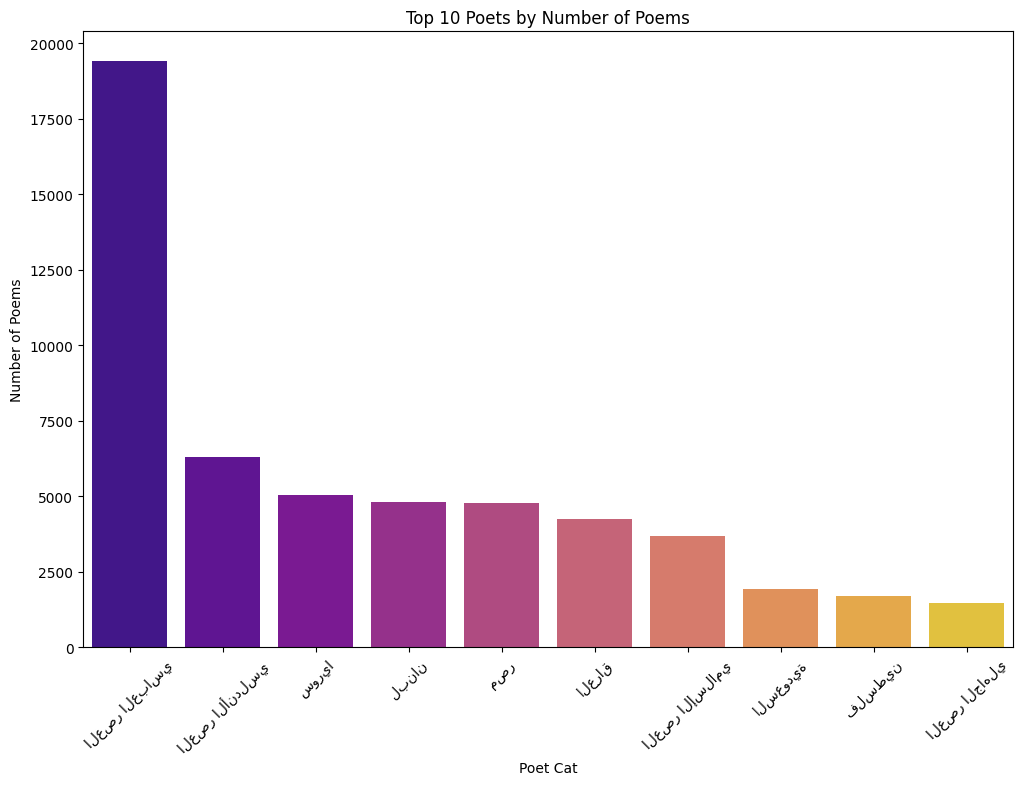

In [32]:
# Count the number of poems per poet
poet_counts = df['poet_cat'].value_counts()
top_poets = poet_counts.head(10)

# Plot the top poets
plt.figure(figsize=(12, 8))
sns.barplot(x=top_poets.index, y=top_poets.values, palette='plasma')
plt.title('Top 10 Poets by Number of Poems')
plt.xlabel('Poet Cat')
plt.ylabel('Number of Poems')
plt.xticks(rotation=45)
plt.show()


In [37]:
new_data = df[(df['poet_cat'] == 'العصر العباسي') & (df['poem_style'] == 'فصحى')]


In [38]:
df2 = new_data.sample(n=200, random_state=42)  # random_state for reproducibility


In [39]:
def clean_text(text):
    # Remove punctuation only allow string or space
    text = re.sub(r'[^\w\s]', '', text)
    # Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text)
    # Remove numbers
    text= re.sub(r'\d+', '', text)
    text = re.sub(r'_', '', text)

    return text

In [40]:
df2['poem_text'] = df2['poem_text'].apply(clean_text)


In [41]:
import torch
import torch.nn as nn
from torch.nn import functional as F
torch.manual_seed(1337) # Robust 

In [42]:
import torch

def tokenize_sentence(sentence):
    # Tokenize the sentence into words
    return sentence.split()

# Assuming df2['poem_text'] contains the text data as before
text = ' '.join(df2['poem_text'].astype(str).tolist())

# Tokenize the concatenated text by words
tokens = tokenize_sentence(text)

# Find unique tokens (words) and sort them
unique_tokens = sorted(set(tokens))
vocab_size = len(unique_tokens)

# Create mappings
stoi = {word: i for i, word in enumerate(unique_tokens)}
itos = {i: word for i, word in enumerate(unique_tokens)}

# Define encode and decode functions
encode = lambda s: [stoi.get(word) for word in s]
decode = lambda l: ' '.join([itos.get(i) for i in l])

# Prepare data
encoded_tokens = encode(tokens)  # Encode the tokens (words)
data = torch.tensor(encoded_tokens, dtype=torch.long)

# Split data into train and validation sets
n = int(0.9 * len(data))  # 90% train, 10% validation
train_data = data[:n]
val_data = data[n:]

# Decode the encoded tokens back to text
decoded_text = decode(encoded_tokens)

# Print some information
print(f"Vocabulary size: {len(stoi)}")
print(f"Train data size: {len(train_data)}")
print(f"Validation data size: {len(val_data)}")


Vocabulary size: 13498
Train data size: 26410
Validation data size: 2935


In [43]:
def tokenize_sentence(sentence):
    # Tokenize the sentence into characters including spaces
    return list(sentence)

text = ' '.join(df2['poem_text'].astype(str).tolist())  
# Tokenize the concatenated text
tokens = tokenize_sentence(text)

# Find unique tokens and sort them
unique_tokens = sorted(set(tokens))
vocab_size = len(unique_tokens)

# Create mappings
stoi = {ch: i for i, ch in enumerate(unique_tokens)}
itos = {i: ch for i, ch in enumerate(unique_tokens)}

# Define encode and decode functions
encode = lambda s: [stoi.get(c) for c in s] 
decode = lambda l: ''.join([itos.get(i) for i in l])  

# Prepare data
encoded_tokens = encode(tokens)  # Encode the tokens
data = torch.tensor(encoded_tokens, dtype=torch.long)

# Split data into train and validation sets
n = int(0.9 * len(data))  # 90% train, 10% validation
train_data = data[:n]
val_data = data[n:]

# Decode the encoded tokens back to text
decoded_text = decode(encoded_tokens)

# Print some information
print(f"Vocabulary size: {len(stoi)}")
print(f"Train data size: {len(train_data)}")
print(f"Validation data size: {len(val_data)}")

Vocabulary size: 32
Train data size: 133887
Validation data size: 14877


In [49]:
# hyperparameters
batch_size = 64 # how many independent sequences will we process in parallel?
block_size = 256 # what is the maximum context length for predictions?
max_iters = 4000
eval_interval = 500
learning_rate = 0.001
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 200
n_embd = 384
n_head = 6
n_layer = 6
dropout = 0.2


def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    x, y = x.to(device), y.to(device)
    return x, y

In [50]:
xb, yb = get_batch('train')


In [51]:
decode(yb.tolist()[0])


'ها كمن داري اذا باراها قوم فقلبي حبها باري وما يرهبني جار ي ان ناضل او جاري وما عرسي حوراء ولا خبزي حوارا  وجه كوجه الغول فيه سماجة مفوهة شوهاء ذات مشافر  حتي متي انا صابر يا هاجر اتري لهذا الهجر عند ك اخر ما كنت لولا نظم ثغرك ناظما وبوصف ثغرك صح اني شاعر '

In [52]:
class Head(nn.Module):
    """ one head of self-attention """

    def __init__(self, head_size):
        super().__init__()
        self.key = nn.Linear(n_embd, head_size, bias=False)
        self.query = nn.Linear(n_embd, head_size, bias=False)
        self.value = nn.Linear(n_embd, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(block_size, block_size)))

        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        # input of size (batch, time-step, channels)
        # output of size (batch, time-step, head size)
        B,T,C = x.shape
        k = self.key(x)   # (B,T,hs)
        q = self.query(x) # (B,T,hs)
        # compute attention scores ("affinities")
        wei = q @ k.transpose(-2,-1) * k.shape[-1]**-0.5 # (B, T, hs) @ (B, hs, T) -> (B, T, T)
        wei = wei.masked_fill(self.tril[:T, :T] == 0, float('-inf')) # (B, T, T)
        wei = F.softmax(wei, dim=-1) # (B, T, T)
        wei = self.dropout(wei)
        # perform the weighted aggregation of the values
        v = self.value(x) # (B,T,hs)
        out = wei @ v # (B, T, T) @ (B, T, hs) -> (B, T, hs)
        return out

class MultiHeadAttention(nn.Module):
    """ multiple heads of self-attention in parallel """

    def __init__(self, num_heads, head_size):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size) for _ in range(num_heads)])
        self.proj = nn.Linear(head_size * num_heads, n_embd)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1)
        out = self.dropout(self.proj(out))
        return out

class FeedFoward(nn.Module):
    """ a simple linear layer followed by a non-linearity """

    def __init__(self, n_embd):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_embd, 4 * n_embd),
            nn.ReLU(), # GELU
            nn.Linear(4 * n_embd, n_embd),
            nn.Dropout(dropout),
        )

    def forward(self, x):
        return self.net(x)

class Block(nn.Module):
    """ Transformer block: communication followed by computation """

    def __init__(self, n_embd, n_head):
        # n_embd: embedding dimension, n_head: the number of heads we'd like
        super().__init__()
        head_size = n_embd // n_head
        self.sa = MultiHeadAttention(n_head, head_size)
        self.ffwd = FeedFoward(n_embd)
        self.ln1 = nn.LayerNorm(n_embd)
        self.ln2 = nn.LayerNorm(n_embd)

    def forward(self, x):
        x = x + self.sa(self.ln1(x))
        x = x + self.ffwd(self.ln2(x))
        return x

class GPTLanguageModel(nn.Module):

    def __init__(self):
        super().__init__()
        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, n_embd)
        self.position_embedding_table = nn.Embedding(block_size, n_embd)
        self.blocks = nn.Sequential(*[Block(n_embd, n_head=n_head) for _ in range(n_layer)])
        self.ln_f = nn.LayerNorm(n_embd) # final layer norm
        self.lm_head = nn.Linear(n_embd, vocab_size)
        self.apply(self._init_weights)

    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            torch.nn.init.normal_(module.weight, mean=0.0, std=0.02)
            if module.bias is not None:
                torch.nn.init.zeros_(module.bias)
        elif isinstance(module, nn.Embedding):
            torch.nn.init.normal_(module.weight, mean=0.0, std=0.02)

    def forward(self, idx, targets=None):
        B, T = idx.shape

        # idx and targets are both (B,T) tensor of integers
        tok_emb = self.token_embedding_table(idx) # (B,T,C)
        pos_emb = self.position_embedding_table(torch.arange(T, device=device)) # (T,C)
        x = tok_emb + pos_emb # (B,T,C)
        x = self.blocks(x) # (B,T,C)
        x = self.ln_f(x) # (B,T,C)
        logits = self.lm_head(x) # (B,T,vocab_size)

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # crop idx to the last block_size tokens
            idx_cond = idx[:, -block_size:]
            # get the predictions
            logits, loss = self(idx_cond)
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx

In [53]:
from sklearn.metrics import f1_score

@torch.no_grad()
def estimate_loss_and_metrics():
    out = {'loss': {}, 'accuracy': {}, 'f1_score': {}}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        all_predictions = []
        all_labels = []
        
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss = model(X, Y)
            losses[k] = loss.item()
            
            # Get predictions from logits
            _, predicted = torch.max(logits, dim=-1)
            
            # Flatten the tensors to make them compatible with sklearn metrics
            all_predictions.extend(predicted.view(-1).cpu().numpy())
            all_labels.extend(Y.view(-1).cpu().numpy())
        
        # Calculate F1 score
        f1 = f1_score(all_labels, all_predictions, average='macro')

        # Store the mean loss, accuracy, and F1 score for this split
        accuracy = sum(p == l for p, l in zip(all_predictions, all_labels)) / len(all_labels)
        out['loss'][split] = losses.mean().item()
        out['accuracy'][split] = accuracy
        out['f1_score'][split] = f1
    
    model.train()
    return out

# Initialize model
model = GPTLanguageModel()
m = model.to(device)

# Print the number of parameters in the model
print(sum(p.numel() for p in m.parameters()) / 1e6, 'M parameters')

# Create a PyTorch optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

for iter in range(max_iters):

    # Evaluate the loss, accuracy, and F1 score on train and val sets at intervals
    if iter % eval_interval == 0 or iter == max_iters - 1:
        metrics = estimate_loss_and_metrics()
        print(f"step {iter}: train loss {metrics['loss']['train']:.4f}, val loss {metrics['loss']['val']:.4f}")
        print(f"          train accuracy {metrics['accuracy']['train']:.4f}, val accuracy {metrics['accuracy']['val']:.4f}")
        print(f"          train F1 score {metrics['f1_score']['train']:.4f}, val F1 score {metrics['f1_score']['val']:.4f}")

    # Sample a batch of data
    xb, yb = get_batch('train')

    # Evaluate the loss
    logits, loss = model(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()


10.763552 M parameters
step 0: train loss 3.5272, val loss 3.5301
          train accuracy 0.0183, val accuracy 0.0182
          train F1 score 0.0081, val F1 score 0.0081
step 500: train loss 2.3436, val loss 2.3720
          train accuracy 0.3512, val accuracy 0.3508
          train F1 score 0.0851, val F1 score 0.0870
step 1000: train loss 2.0425, val loss 2.2332
          train accuracy 0.4108, val accuracy 0.3793
          train F1 score 0.1819, val F1 score 0.1439
step 1500: train loss 1.5946, val loss 2.3197
          train accuracy 0.5272, val accuracy 0.3762
          train F1 score 0.3755, val F1 score 0.1580
step 2000: train loss 0.7081, val loss 3.0623
          train accuracy 0.7879, val accuracy 0.3370
          train F1 score 0.7416, val F1 score 0.1486
step 2500: train loss 0.2166, val loss 4.0505
          train accuracy 0.9383, val accuracy 0.3239
          train F1 score 0.9342, val F1 score 0.1402
step 3000: train loss 0.1303, val loss 4.7269
          train accurac

In [59]:
#genrate poem from model
context = torch.zeros((1, 1), dtype=torch.long, device=device)
print(decode(m.generate(context, max_new_tokens=500)[0].tolist()))

 الغواء والي عن هوي الابوعابدي وراحة في ظل تقوي كل جة والمودة الناس رايها من قعضت بالشاح واري الصباح يا ن لا مء في لهو خفض من عيا  طلع احديث كسر واح انسيم نظر من الا اليل هو الطواح المعيس تمادح ان الا بالي فلا العراق حولي السباق لا ان نجم من بعد شر فعله وان عدو في الذي يوما الغارا اذا من الطول المقا ليل او فقان مست اري السك يفر في ليس عنه القيا اما عليك دعاجر وراد المجد من التي علي المجد ما سل الا برءيت الفقافا لا يه في العنا من المكان يصخر ان كان ذا الا لكناء ثم الملوار في الدهر يقطع الخلب ولون 
